# Software Coursework 2

Name: Rosemary Odinakachi Nnamdi

MSC Financial Technology

S2244511

RNNAMD300@caledonian.ac.uk

#Introduction

Convolutional Neural Network is a deep learning mechanism that is designed to learn from data, especially pixel data. CNN or CovNet is an architecture that can be utilized in carrying out image recognition and similar activities. 
The goal of this network architecture is to recognize patterns in pixel data and intensely utilised in technology that needs seamless object identification systems. For instance, it can be applied to innovations like self driving vehicles. 
The structure of the CovNet or CNN can be likened to the connectivity of the brain. In the case of the human brain, it has billions of neurons working together to achieve different activities such as recognition. In the case of CNN, it has numerous layers that work together to try and detect varying elements in a picture. 
These layers are made up of input layers, output layers and other types of layers that reside in between the aforementioned.  Typically, a CovNet has three popular layers that are worthy of mentioning, which are the pooling, activation and convolution. 

When it is at the convolutional layer, a filter checks the image for features. The activation or ReLU (Rectified linear unit) layer is designed to change negative values in the input to zero. 
In the pooling layer, a filter reduces the complexity of the input. When one compares CovNet with its predecessors, it is more efficient when it comes to a wide array of inputs such as image and speech.
CovNet can be utilized in different fields such as object identification, medical imaging, audio processing and much more. CNN comes in different algorithms such as AlexNet, LeNet, Resnet, VGG, GoogleNetor Inception and much more. 

In this coursework, I want to check out the efficacy of two CNN algorithms, LeNet and GoogleNet on the MNIST dataset. I will check out their level of accuracy and compare the functionalities of both algorithms. 


#Dataset Chosen 
MNIST is a database that is notable in the machine/ deep learning space for containing handwritten digits that are utilized in training models. The Modified National Institute of Standards and Technology database is great for testing the efficacy of image processing systems without having to deal with data that is not well formatted. It has a total number of 70,000 handwritten digits which came from altering the structure of the NIST database. 
In this case, I will utilize the MNIST database to test the efficacy of AlexNet and LeNet CovNet algorithms. 

# Chosen Algorithms 

Before deciding on my algorithms, I tried out a wide array of them. For instance, I noticed VGG took a longer time to train, which was not feasible for my assignment. I felt the heavy was too heavy for what I intended to achieve. 

Initially I trained a model with VGG, and it was still training after three hours, with no plans of stopping anytime soon.

When I realized that VGG was not suitable, I opted for AlexNet. I did my research on AlexNet, and tried to use my MNIST dataset on it. I realized that it was still training after one hour, not minding that I reduced the epoch to 5 and the batch size to 64.


My research took me on a voyage, where I decided to give LeNet a trial. Compared to others, the training speed was faster than the others I had tried and the accuracy level was high while the test loss was lower.

The second CNN algorithm I opted for was GoogleNet or Inception. The training time was fast, which was one of the reasons I chose it. Below, I will go in depth on the two algorithms I chose and why I chose them.

I referenced the sources of the code of the algorithms I used and explained the steps based on my understanding as requested in the coursework guidelines.



**LeNet-5**

LeNet is a CNN algorithm that was developed in 1998 by four researchers: Yann LeCun, Leon Bottou, Yosuha Bengio and Patrick Haffner.
It was used by commercial banks to identify the handwritten digits on cheques, which is an application of the main purpose of recognizing the numbers on MNIST database. The architecture of this algorithm contains consists three pooling layers and three convolution layers.  
LeNet is faster to train and easier to understand for me. Apart from that, it runs on CPU seamlessly and beginner friendly. 

**GoogLeNet** 

GoogLeNet or Inception was developed by developers at Google and it won the won ILSVRC-2014 prize. It is an adaptation of the LeNet, as it built on it and improved the older version. Its name GoogLeNet was coined from Google and LeNet. 
GoogLeNet is easier to train compared to other CovNet algorithms like AlexNet and VGG. It doesn't use a sequential model like other CNN algorithms such as LeNet and AlexNet, instead of opts for a branching system that results in auxiliary losses.
GoogLeNet is a deep network that doesn't suffer from the drawbacks that come with this feature. Typically, a deep network translates to more training time for parameters, which may not be efficient for most users. It also needs bigger GPUs, making it cumbersome and somewhat expensive. 
To solve this, GoogLeNet utilizes 1x1 convolutions to ensure that the network remains deep without having to deal with the aforementioned issues. It also clamps down on the range of feature maps and ensuring that the sizes of the images remain the same. 
Another reason that GoogLeNet is deep and fast is its usage of two auxiliary losses before the actual loss occurs. This makes the gradients to move with a shorter path. 
GoogLeNet is more concise compared to its counterparts. It has a size of 96 MB, while 528 MB has a size of 528 MB. (Chatuverdi, 2021).





# LeNet Image Classification

The first step in this image classification using LeNet is the imporation of the necessary libraries.
I have imported keras and MNIST dataset.

In [ ]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

**Loading Dataset**

I am importing the MNIST dataset, and splitting them into different groups, which are the train and test.

In [ ]:
# I want to load the dataset and split it
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Distribution of the dataset**

I want to check the distribution of the MNIST dataset.

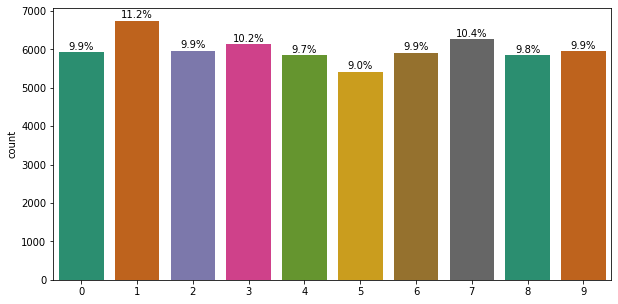

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
ax = sns.countplot(x = y_train, palette = 'Dark2')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

**Image Data Processing**

The next stage is to do is image processing. In this stage, I want to reshape the dataset to effectively work with the Keras API. To do this, I have reshaped i into a 4-dimensional numpy array. The MNIST image is usually 28x28, and LeNet needs 32x32 pixels.

The next stage is to normalize it, which means that I am altering the range of pixel data and get it to a better level. This is a compulsory step.

The next stage is to hot encode the dataset. By this, I am converting categorical data to a form that the algorithm can understand and predict.

In [ ]:
# I am reshaping the dataset.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# I am Normalizing the dataset. 
x_train = x_train / 255
x_test = x_test / 255

# This involves One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

**LENET MODEL ARCHITECTURE**

At this stage, I want to construct the LeNet model. I intend to create a sequential model, before I add more layers to it. It is made up of two important stages, which are divided into the front end and back end structures. The front end is meant for feature extraction, and it is made up of convolutional and pooling layers.
The back end is the classifier section that will be utilized in making prediction.


In the first layer of the CNN layer or C1, it has six feature maps that have strides of one. It has a dimension of 28x28 and an activation function of relu.

In the layer S2, it is an max pooling layer, and its duty is to select maximum feature value that emanated from the prior CNN layer to the next CNN layer. In this layer, the pooling layer has 2.
Max pooling usually opt for features with more dominant functions. This means that only the highest features will be accessed with the pooling layer.


In the layer C3, this is seen as the second CNN layer that has  sixteen feature maps. As for the output dimension, it is ten. The activation function is relu.

In the layer S4, it is a pooling size of 2.

As for the next layer, the layer is meant to flatten the prior layer's output into a one-dimensional array.


In the layer C5, it is fully connected layer as a result of the Dense functionality and it has 120 connections. The activation function is relu.

In the layer F6, it is another fully connected layer as a result of the Dense functionality with 84 parameters. It has an activation functionality of relu.


In the last layer, it is another fully connected layer as a result of the Dense functionality with 10 parameters. It has an activation functionality of softmax.

In [ ]:
# I want to build the sequential model, then add more layers to it.
model = Sequential()

# I am choosing to use a six-feature convolution filter or kernel that has a size of 5*5. 
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))

# The first layer's output will function as the input of this layer. I have also decided to use a convolution kernel or filter of 2*2.
model.add(MaxPooling2D(pool_size=(2, 2)))

# I have decided to use a convolution kernel or filter of size 5*5, with a depth of 16.
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))

# I have decided to use a convolution kernel or filter of size 2*2.
model.add(MaxPooling2D(pool_size=(2, 2)))

# I want to flatten the output of the LeNet and send it to a fully connected layer.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# At this stage, the input nodes are 120 and the output nodes are 84. 
model.add(Dense(84, activation='relu'))
# At this stage, the input nodes are 84 and the output nodes are 10. 
model.add(Dense(10, activation='softmax'))

I want to check the summary of the model.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

**Model Compiling and Fitting**

At this stage, I want to optimize the empty LeNet architecture that I created above.  To do this, I will introduce three parameters, which are the loss function, optimizer and metrics. I am choosing Adam as the optimizer because I have noticed that it is efficient from my research. In the case of the loss function, I am using the Keras metrics categorical crossentropy because it is a multi class classification model. It is also seen as log loss, and it measures the classification model's performance, where its probability values of between 0 and 1.

I used accuracy as the metric that I want to monitor. This is the output layer.

In [ ]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

I have chosen an epoch of 5, which is the number of times that I can iterate on the dataset. Epoch is one cycle that occurs through the entire dataset for training.


Batch size represents how many training examples are in one batch, and in this case is 64. A smaller batch size number was chosen because larger batch sizes could lead to memory issues.

Verbose is 1, which showcases the frequency of output logging.

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 17s 6ms/step - loss: 0.2379 - accuracy: 0.9285 - val_loss: 0.0781 - val_accuracy: 0.9749
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0750 - accuracy: 0.9766 - val_loss: 0.0533 - val_accuracy: 0.9826
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0527 - accuracy: 0.9828 - val_loss: 0.0460 - val_accuracy: 0.9861
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0412 - accuracy: 0.9867 - val_loss: 0.0380 - val_accuracy: 0.9882
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.0472 - val_accuracy: 0.9849


**Performance Evaluation**

I want to evaluate the performance of the model by seeing their level of accuracy and test loss. 

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0472 - accuracy: 0.9849
Test Loss: 0.047181371599435806
Test accuracy: 0.9848999977111816


The accuracy level is quite high for LeNet at 0.99.





In [ ]:
score = model.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 0.0472 - accuracy: 0.9849


I want to plot the model accuracy and model loss.

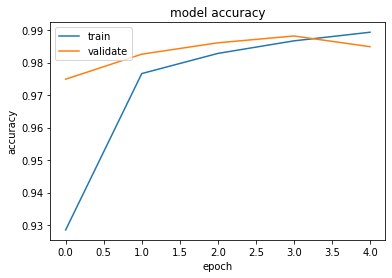

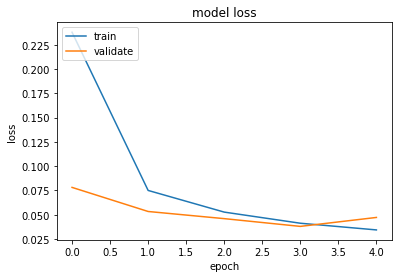

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

**Confusion Matrix**


Another way to check the performance apart from accuracy is confusion matrix. I am using the confusion matrix to check the performance of the classifier. It reports the number of those samples that were classified both correctly and incorrectly. Based on the number of the samples that exist on the diagonal, it determines the accuracy of the model. This means that a higher number of samples that exist on the diagonal, the greater the accuracy of the model.



Confusion matrix needs both labels and predictions to be single-digits, and not one hot encoded vectors. I want to convert them before I use confusion matrix on them.

In [ ]:
import numpy as np

predict_y=model.predict(x_test)
y_test_hat=np.argmax(predict_y,axis=1)
y_test_org = np.argmax(y_test, axis = 1) 

313/313 [==============================] - 1s 2ms/step


In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Dark2):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


**Importing the necessary modules**

In [ ]:
from itertools import product

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

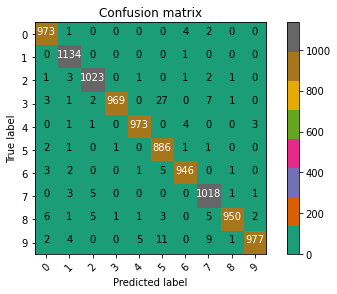

In [ ]:
confusion_mtx = confusion_matrix(y_test_org, y_test_hat) 
plot_confusion_matrix(confusion_mtx, classes = range(10))

The diagonal elements are those number of points where the predicted label was equal to the true label. In this case, the LeNet felt well, though it can be improved by tuning its hyperparameters or even doing data augmentation.

**Classification Report**

I want to check the classification report of the LeNet model.

In [ ]:
print(classification_report(y_test_org,y_test_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.96      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.95      0.99      0.97       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



From the classification report, we can see that LeNet had an accuracy level of 98%.

The precision score is 99%. This means that the prediction is correct about 99% of the time.

The recall is 97%. Recall score measures the performance of the model by measuring the count of true positives. By using both precision and recall score, one can tell the performance of the model in predicting if the classes are not balanced.

The f-1 score is 98%. The higher the f-1 score or the harmonic mean of precision and recall scores, the better the classifier.


Macro-avg is the arithmetic mean of the f1-scores in both categories. Typically, the category with more support have higher scores because they can easily catch rarer categories. 

The weighted average is the precision of every class merged together. It takes the mean of every per-class F1 scores. 

Support represents how many times a class occurred in the dataset.

#Googlenet

**Importation of Libraries**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

**Loading the MNIST dataset**

I am loading the MNIST dataset and dividing them into train, test and validation groups. The MNIST dataset has images with the size of 28x28, while the GoogleNet algorithm is designed to access images of 224x224x3. To solve this, I will expand the third axis and repeat it three times to get a size of 28x28x3.

I am then normalizing the dataset.

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:]
y_train = y_train[:-2000]

**Creating the GoogleNet or Inception Architecture**

The code in the cell below is meant to define the GoogLeNet path. This networ has nine inception blocks, and four max pooling layers that exist outside the blocks.

The first two max pooling layers are between blocks 3 to 4, and the last two layers are between 7 and 8. The aim of the max pooling layer is to clamp down on the input's resolution and cost of computation.

Typically, the GoogLeNet has four parallel paths.

In the first path, I can see a convolutional layer that has a size of 1x1.

As for the two following paths, which are the second and third paths, they have a size of 3x3 and 5x5 respectively.

In the fourth path, it is utilizing a max pooling layer. The aim of this layer is to clamp down on the input's resolution.

The last part of the code is a convolutional layer of size of 1x1 with the aim of clamping down on the dimension. 

In [ ]:
# Defining the GoogleNet or Inception path.
def inception(x,
              filters_1x1,
              filters_3x3_reduce,
              filters_3x3,
              filters_5x5_reduce,
              filters_5x5,
              filters_pool):
  path1 = layers.Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

  path2 = layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
  path2 = layers.Conv2D(filters_3x3, (1, 1), padding='same', activation='relu')(path2)

  path3 = layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
  path3 = layers.Conv2D(filters_5x5, (1, 1), padding='same', activation='relu')(path3)

  path4 = layers.MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
  path4 = layers.Conv2D(filters_pool, (1, 1), padding='same', activation='relu')(path4)

  return tf.concat([path1, path2, path3, path4], axis=3)

By padding, it is adding zeros to the image's edges to ensure that the features of the images edges are identifiable and to receive an output that resembles the input.

The output is being flattened to make it easier for the algorithm to understand the features that were extracted and churn out a good model.

The GoogleNet has nine inception blocks, with four max pooling layers, which are designed to clamp down on how complex the model is by reducing the input data.

Every inception block is designed to  simultaenously extract the input features via four parallel paths. Using max pooling layer helps to reduce the resolution, ensuring that the network has a smaller number of parameters.


Strides explain by how much the convolution filter is moved in each step. Typically, the conventional stride is pegged at 1. When it is above 1, it means that it will have lesser overlap in the receptive fields.

Padding refers to the grey area that surrounds the input and it is utilized to ensure that the size of the feature maps remain the same. If this is not done, the feature maps would shrink.

The Conv2D is designed to create a convolutional layer. It contains the filter count, kernel size, filter size, padding and activation function. In the first convolution layer, it is a convolutional layer with filter of 64, kernel size of 7, and strides of 2. The activation function was relu. The padding was same. Padding can either be same or valid. When it is same, it means that it is padded with the number on the edge. If it were the valid option chosen, it would have meant that there was no padding. 

As the convolution operation is done, the next step is to do pooling. This is done to clamp down on the dimensionality, by reducing the parameters and keeping only the important information. When pooling is done, the training time reduces, thereby minimizing the risk of overfitting. Max pooling is interested in the maximum value.

The difference between a pooling and convolution layer is that the pooling typically has a stride of 2 and no padding, while the latter possesses a stride of 1 and padding.


Another important feature in the GoogleNet code is the hyperparameters, which include the filter sizes of 1x1,3x3 and 5x5. It has a filter count of between 32 and 1024, but in this case, we are using between 16 and 128. The higher the filter count used, the more powerful the model that is created, though it comes with the potential risk of overfitting.


The next important feature is the fully connected network that are created after creating the convolution and pooling. Flattening is done in this stage because the outputs that come from convolution and pooling are 3D volumes, while 1D vector is what the fully connected wants. Basically, this process converts the 3D to 1D.

Dropout is a regularization technique that tries to prevent overfitting, thereby improving accuracy. When dropout is done, it makes every neuron in the network to be independent by purposely disabling some neurons. Dropout is only done to the hidden layers of inputs. It is not effected on the output nodes.

The activation function of the output layer is softmax and it gives a thousand outputs.


The convolution and pooling layers carry out the feature extraction aspect of a CNN model.

In [ ]:
inp = layers.Input(shape=(32, 32, 3))
input_tensor = layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:])(inp)

# This is a convolutional layer with filter of 64, kernel size of 7, and strides of 2.
x = layers.Conv2D(64, 7, strides=2, padding='same', activation='relu')(input_tensor)

# This is a max pooling layer with a pool sixe of 3, and strides of 2
x = layers.MaxPooling2D(3, strides=2)(x)

# This is a convolutional layer with filter of 64 and strides of 1.
x = layers.Conv2D(64, 1, strides=1, padding='same', activation='relu')(x)

# This is a convolutional layer with filter of 192 and strides of 1.
x = layers.Conv2D(192, 3, strides=1, padding='same', activation='relu')(x)

# This is a max pooling layer with a pool sixe of 3, and strides of 2
x = layers.MaxPooling2D(3, strides=2)(x)

# This is the first inception block.
x = inception(x,
              filters_1x1=64,
              filters_3x3_reduce=96,
              filters_3x3=128,
              filters_5x5_reduce=16,
              filters_5x5=32,
              filters_pool=32)

# This is the second inception block.
x = inception(x,
              filters_1x1=128,
              filters_3x3_reduce=128,
              filters_3x3=192,
              filters_5x5_reduce=32,
              filters_5x5=96,
              filters_pool=64)

# This is a max pooling layer with a pool sixe of 3, and strides of 2
x = layers.MaxPooling2D(3, strides=2)(x)

# This is the third inception block.
x = inception(x,
              filters_1x1=192,
              filters_3x3_reduce=96,
              filters_3x3=208,
              filters_5x5_reduce=16,
              filters_5x5=48,
              filters_pool=64)

# This is the extra network 1
aux1 = layers.AveragePooling2D((5, 5), strides=3)(x)
aux1 = layers.Conv2D(128, 1, padding='same', activation='relu')(aux1)
aux1 = layers.Flatten()(aux1)
aux1 = layers.Dense(1024, activation='relu')(aux1)
aux1 = layers.Dropout(0.7)(aux1)
aux1 = layers.Dense(10, activation='softmax')(aux1)

# This is the fourth inception block.
x = inception(x,
              filters_1x1=160,
              filters_3x3_reduce=112,
              filters_3x3=224,
              filters_5x5_reduce=24,
              filters_5x5=64,
              filters_pool=64)

# This is the fifth inception block.
x = inception(x,
              filters_1x1=128,
              filters_3x3_reduce=128,
              filters_3x3=256,
              filters_5x5_reduce=24,
              filters_5x5=64,
              filters_pool=64)

# This is the sixth inception block.
x = inception(x,
              filters_1x1=112,
              filters_3x3_reduce=144,
              filters_3x3=288,
              filters_5x5_reduce=32,
              filters_5x5=64,
              filters_pool=64)

# This is the extra network 2
aux2 = layers.AveragePooling2D((5, 5), strides=3)(x)
aux2 = layers.Conv2D(128, 1, padding='same', activation='relu')(aux2)
aux2 = layers.Flatten()(aux2)
aux2 = layers.Dense(1024, activation='relu')(aux2)
aux2 = layers.Dropout(0.7)(aux2)
aux2 = layers.Dense(10, activation='softmax')(aux2)

# This is the seventh inception block.
x = inception(x,
              filters_1x1=256,
              filters_3x3_reduce=160,
              filters_3x3=320,
              filters_5x5_reduce=32,
              filters_5x5=128,
              filters_pool=128)

# This is a max pooling layer with a pool sixe of 3, and strides of 2
x = layers.MaxPooling2D(3, strides=2)(x)

# This is the eight inception block.
x = inception(x,
              filters_1x1=256,
              filters_3x3_reduce=160,
              filters_3x3=320,
              filters_5x5_reduce=32,
              filters_5x5=128,
              filters_pool=128)

# This is the ninth inception block.
x = inception(x,
              filters_1x1=384,
              filters_3x3_reduce=192,
              filters_3x3=384,
              filters_5x5_reduce=48,
              filters_5x5=128,
              filters_pool=128)

# This is the Global Average Pooling layer.
x = layers.GlobalAveragePooling2D()(x)

# This is the dropout layer
x = layers.Dropout(0.4)(x)

# This is the output layer
out = layers.Dense(10, activation='softmax')(x)

In [ ]:
# This is the model.
model = Model(inputs = inp, outputs = [out, aux1, aux2])

**Compiling the model**

I want to optimize the empty GoogLeNet architecture that I created above.  To do this, I will introduce three parameters, which are the loss function, optimizer and metrics. I am choosing Adam as the optimizer because I have noticed that it is efficient from my research. In the case of the loss function, I am using the Sparse categorical crossentropy because it is a multi class classification model.

I used accuracy as the metric that I want to monitor. 

In [ ]:
model.compile(optimizer='adam', loss=[losses.sparse_categorical_crossentropy, losses.sparse_categorical_crossentropy, losses.sparse_categorical_crossentropy], loss_weights=[1, 0.3, 0.3], metrics=['accuracy'])

The batch size is 64, while the epoch was pegged at 5 to ensure that the training time was shorter.

In [ ]:
history = model.fit(x_train, [y_train, y_train, y_train], validation_data=(x_val, [y_val, y_val, y_val]), batch_size=64, epochs=5)

Epoch 1/5
907/907 [==============================] - 162s 172ms/step - loss: 1.2008 - dense_7_loss: 0.8825 - dense_4_loss: 0.4967 - dense_6_loss: 0.5644 - dense_7_accuracy: 0.6900 - dense_4_accuracy: 0.8312 - dense_6_accuracy: 0.8045 - val_loss: 0.1880 - val_dense_7_loss: 0.1356 - val_dense_4_loss: 0.0922 - val_dense_6_loss: 0.0824 - val_dense_7_accuracy: 0.9650 - val_dense_4_accuracy: 0.9740 - val_dense_6_accuracy: 0.9765
Epoch 2/5
907/907 [==============================] - 153s 169ms/step - loss: 0.2332 - dense_7_loss: 0.1607 - dense_4_loss: 0.1177 - dense_6_loss: 0.1241 - dense_7_accuracy: 0.9525 - dense_4_accuracy: 0.9645 - dense_6_accuracy: 0.9627 - val_loss: 0.1175 - val_dense_7_loss: 0.0735 - val_dense_4_loss: 0.0603 - val_dense_6_loss: 0.0862 - val_dense_7_accuracy: 0.9785 - val_dense_4_accuracy: 0.9835 - val_dense_6_accuracy: 0.9760
Epoch 3/5
907/907 [==============================] - 155s 170ms/step - loss: 0.1574 - dense_7_loss: 0.1038 - dense_4_loss: 0.0888 - dense_6_loss: 

This plots the results of the training by showing the loss, validation loss, and accuracy.

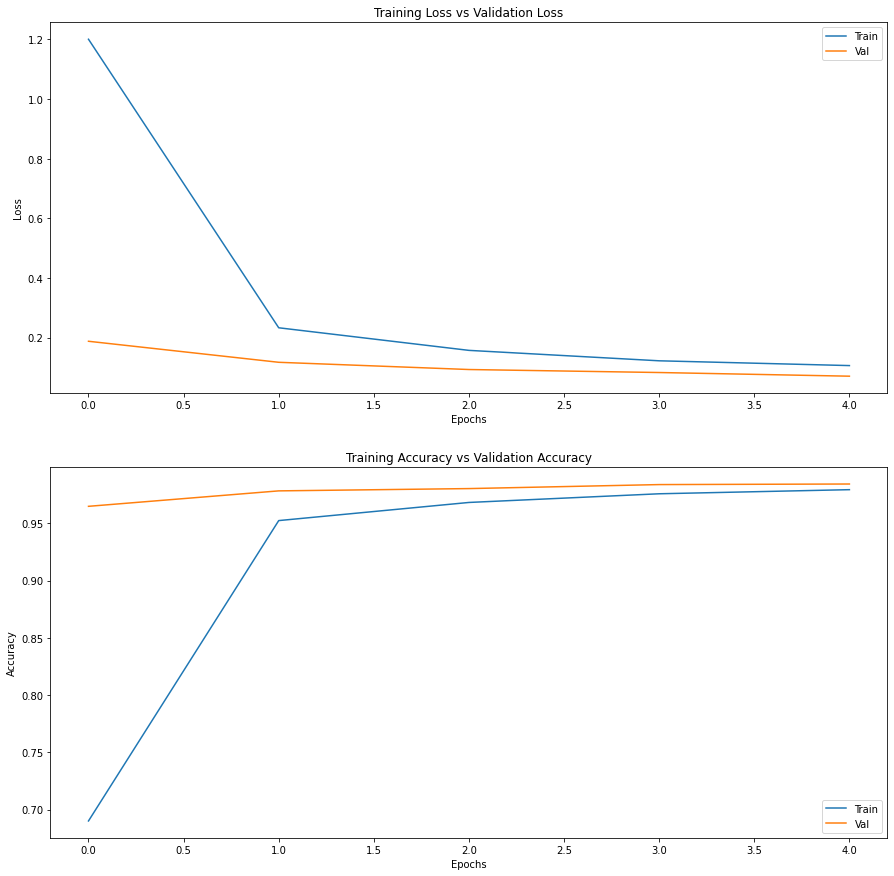

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['dense_7_accuracy'])
axs[1].plot(history.history['val_dense_7_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

The gap between the valiodation loss and train loss is shrinking after every epoch. This occurs because the network is learning the data. This also reduces the regularization loss.

This will disclose the accuracy level in figures.

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 11s 31ms/step - loss: 0.0890 - dense_7_loss: 0.0671 - dense_4_loss: 0.0334 - dense_6_loss: 0.0396 - dense_7_accuracy: 0.9786 - dense_4_accuracy: 0.9893 - dense_6_accuracy: 0.9868


[0.0889996737241745,
 0.0670817419886589,
 0.033418234437704086,
 0.03964146599173546,
 0.978600025177002,
 0.989300012588501,
 0.9868000149726868]

GoogleNet has a loss of 0.089, which is low and an accuracy level of 0.987. It is at par with LeNet in this case.

# Comparison of Chosen Algorithms

From the analysis above, the accuracy levels are 0.99 for GoogleNet and LeNet. I feel the value would have increased if I had increased the epoch and batch size and did hyperparameter tuning or augmentation.

The train loss for LeNet was 0.03728 and the train loss for GoogleNet was 0.089. The train loss is lower for LeNet means that there are fewer errors. 

LeNet is older than GoogleNet as the former was developed in 1998 and 2014 respectively. The former has sixty thousand parameters and the latter has four million parameters. 

LeNet can run smoothly either on CPU or GPU, while I noticed that GoogleNet had a slow training time on CPU, but was faster on GPU.

GoogleNEt uses inception modules and Average Pooling which reduced the number of necessary parameters when you compare it with the likes of Alexnet while LeNet uses two fully connected layers. 

LeNet may be an awesome way to be introduced into CNN and deep learning, but it has its downsides. The model is not designed to be deep, meaning that it may not work effectively if it is not fed with enough data. 

#Conclusion


I realized that the training time for GoogleNet was longer when I trained it in this notebook under LeNet than when I trained it in a separate notebook. When I trained it in a separate Jupyter notebook, it was faster.

I did my research and realized that I could change my runtime type to GPU instead of CPU. This improved the speed of my training for GoogleNet.

On the other hand, LeNet training time was fast, not minding if the Google Colab notebook was on GPU or CPU.

I believe that the accuracy level for both algorithms would have been better if I had increased the epoch and batch size, but I was considering training time for both myself and the lecturer marking this coursework.

The performance of the CNN models could have also been improved by finetuning them using data augmentation or hyperparameter tuning. Data Augmentation involves improving the amount of data that the model has access to by creating new data points from existing data. By doing that, the model  performance improves because overfitting is reduced. Data augmentation involves creating realistic images based on transformative avtivities such as changing the contrast, exposure or even resizing the images.


By hyperparameter tuning, we can change parameters like batch size, epoch, activation function and so on to improve the performance of the model.

#Reference

Das, S. (2017) CNN Architectures: LeNet, AlexNet, VGG, GoogLeNet, ResNet and more… Available at:
https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5 (Accessed: 18 December 2022).


Chaturvedi, A. (2022) GoogLeNet Model. AVailable at:
https://www.codingninjas.com/codestudio/library/googlenet-model (Accessed: 19 December 2022).

Mrgrhn (2021) GoogLeNet (InceptionV1) with TensorFlow. Available at: 
https://ai.plainenglish.io/googlenet-inceptionv1-with-tensorflow-9e7f3a161e87  (Accessed: 23 December 2022).


MathWorks (no date) What Is a Convolutional Neural Network? Available at:
https://www.mathworks.com/discovery/convolutional-neural-network-matlab.html#:~:text=A%20convolutional%20neural%20network%20(CNN,%2Dseries%2C%20and%20signal%20data. (Accessed: 24 December 2022).

MNSIT - CNN with Augmentation
https://www.kaggle.com/code/sandhyakrishnan02/mnsit-cnn-with-augmentation#5.-Importing-Libraries-and-Data-File

Awati, R. (2022) convolutional neural network (CNN). Available at:
https://www.techtarget.com/searchenterpriseai/definition/convolutional-neural-network?amp=1 (Accessed: 21 December 2022).

SelectStar (2020) What is MNIST? And why is it important? Available at:
https://selectstar-ai.medium.com/what-is-mnist-and-why-is-it-important-e9a269edbad5 (Accessed: 20 December 2022).


https://medium.com/swlh/alexnet-with-tensorflow-46f366559ce8


Le, K. (2021) Implementation of GoogLeNet on Keras. Available at: 
https://medium.com/mlearning-ai/implementation-of-googlenet-on-keras-d9873aeed83c (Accessed: 15 December 2022).


Varshney, P. (2020). LeNet Architecture: A Complete Guide. Available at:
https://www.kaggle.com/code/blurredmachine/lenet-architecture-a-complete-guide/notebook (Accessed: 18 December 2022).